# Bike Rental Assigment using Linear Regression

##### Problem Statement: To construct a linear regression model on Bike Rental dataset to predict count of bike rentals that would occur on a given day. The bike rental dataset includes variables that might be significant in predicting the count of rentals such as weather information, season, month, day of the week etc.

##### The constructed model is expected to have a fair amount of explanatory power, which is expected to be consistent across training and test tests, i.e. the model should not overfit the training data and should be generalizable within the bounds of ranges of independent variables. Also, the prediction errors are expected to be random and normally distributed, which would mean that model has a low bias.

In [924]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

### Read the dataset and do some cursory checks

In [925]:
data = pd.read_csv('day.csv')

In [926]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [927]:
data.shape

(730, 16)

In [928]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [929]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Visualization:
#### Understand the data and try to look for patterns and interdependencies among independent variables and their relation with 'cnt' - i.e. the count of bike shares, which is our target variable

#### Remove the record index and date variables as they are not relevant to predicting count of rentals

In [930]:
data = data.iloc[:,2:]

In [931]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


#### Make pairplots to check for multicollinearity and relation with count

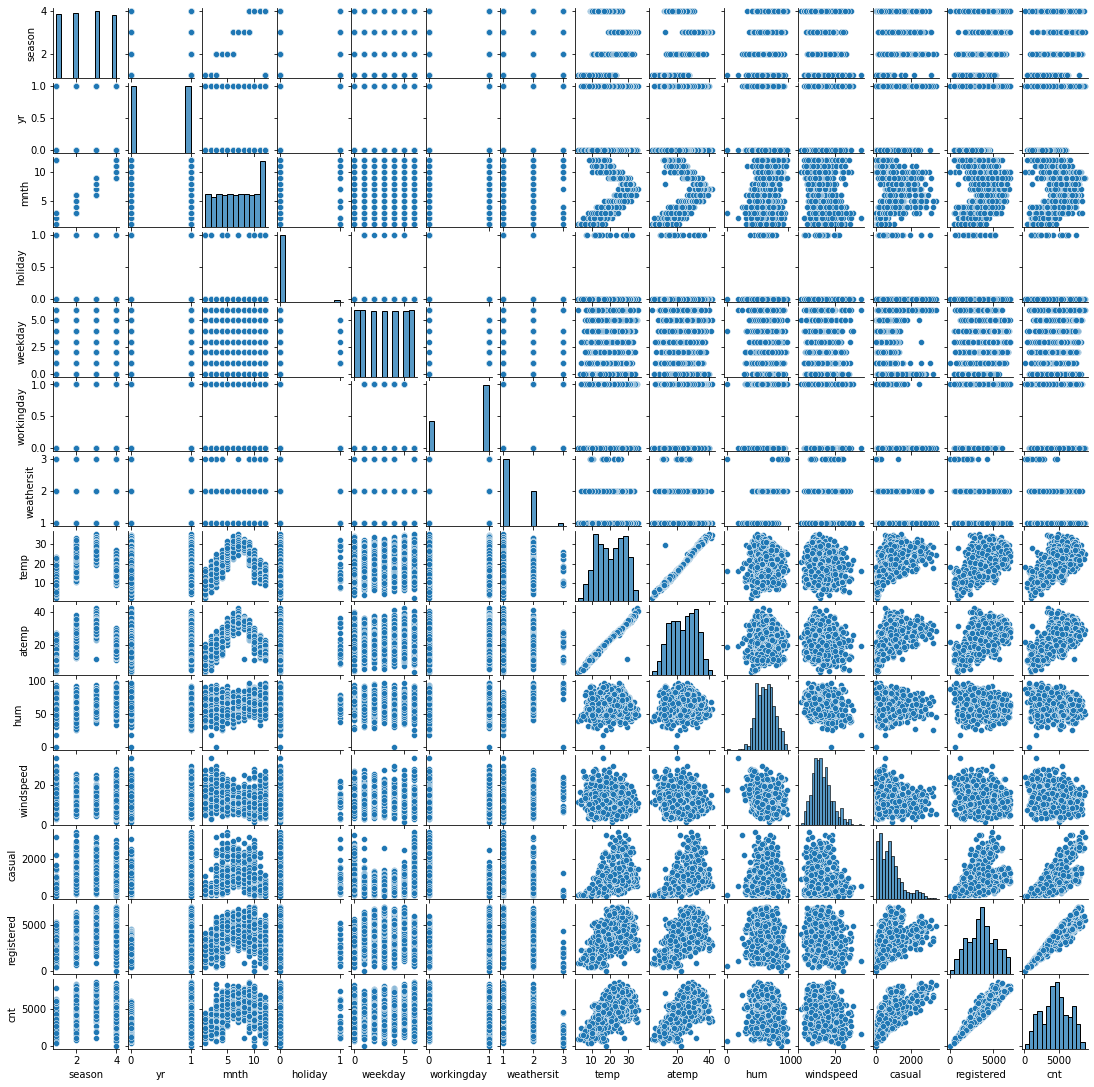

In [932]:
g=sns.pairplot(data)
g.fig.set_size_inches(15,15)
plt.show(g)

### Observations:

1. ***Temp*** and ***Atemp*** are highly correlated with each other
2. ***Temp*** and ***Months*** show a clear pattern. This is expected as temprature varies gradually   with months of the year
3. ***Registered*** and ***Casual*** show a high correlation with count. 
4. ***Temp*** shows moderate correlation with ***count*** 
5. A pattern of bike rentals is evident across ***months***

In [933]:
#make a copy of data for possible use later on
data_copy = data.copy()

### Check correlations between numerical variables

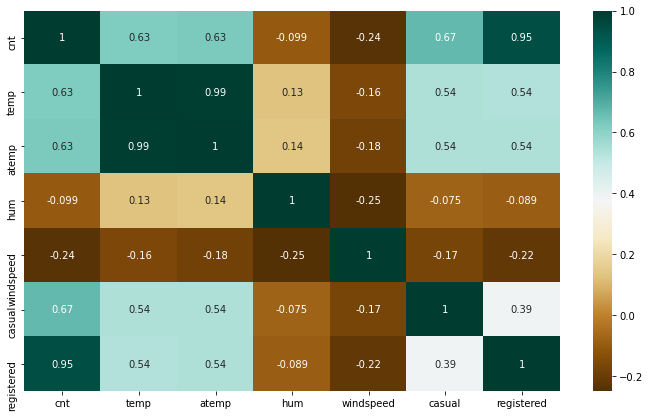

In [937]:
#create correlation heatmap

num_vars = ['cnt', 'temp', 'atemp', 'hum','windspeed','casual', 'registered' ]
plt.figure(figsize = (12, 7))
sns.heatmap(data[num_vars].corr(), annot = True, cmap="BrBG")
plt.show()

### Observations and Inferences:

1. The correlation matrix confirms many of observations we saw earlier with pair plots. Temp and Atemp show a very high correlation of 99%. This is not surprising since 'Feel-like' temprature (Atemp) is rarely very different from the actual temprature (temp)
2. Casual and Registered have a high correlation with count. Again, this is expected as more the number of registered users on a given day, higher the rentals.
3. Temprature has a moderately high correlation of 63% with count

### Create Dummy Variables from Categorical variables before doing analysis on these variables

In [938]:
data['mnth'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12:'Dec'}, inplace=True)

In [939]:
mnth_dummy = pd.get_dummies(data['mnth'], drop_first = True)

In [940]:
mnth_dummy

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [941]:
data = pd.concat([data, mnth_dummy], axis = 1)

In [942]:
data['weathersit'].replace({1:'Weather1', 2:'Weather2', 3:'Weather3', 4:'Weather4'}, inplace=True)

In [943]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,0,Jan,0,6,0,Weather2,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,1,0,Jan,0,0,0,Weather2,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,1,0,Jan,0,1,1,Weather1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,1,0,Jan,0,2,1,Weather1,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,1,0,Jan,0,3,1,Weather1,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,Dec,0,4,1,Weather2,10.420847,11.33210,65.2917,...,1,0,0,0,0,0,0,0,0,0
726,1,1,Dec,0,5,1,Weather2,10.386653,12.75230,59.0000,...,1,0,0,0,0,0,0,0,0,0
727,1,1,Dec,0,6,0,Weather2,10.386653,12.12000,75.2917,...,1,0,0,0,0,0,0,0,0,0
728,1,1,Dec,0,0,0,Weather1,10.489153,11.58500,48.3333,...,1,0,0,0,0,0,0,0,0,0


In [944]:
weather_dummy = pd.get_dummies(data['weathersit'], drop_first = True)

In [945]:
weather_dummy

,Weather2,Weather3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [946]:
data = pd.concat([data, weather_dummy], axis = 1)

In [947]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Weather2,Weather3
0,1,0,Jan,0,6,0,Weather2,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,0,0,1,0
1,1,0,Jan,0,0,0,Weather2,14.902598,17.68695,69.6087,...,1,0,0,0,0,0,0,0,1,0
2,1,0,Jan,0,1,1,Weather1,8.050924,9.47025,43.7273,...,1,0,0,0,0,0,0,0,0,0
3,1,0,Jan,0,2,1,Weather1,8.200000,10.60610,59.0435,...,1,0,0,0,0,0,0,0,0,0
4,1,0,Jan,0,3,1,Weather1,9.305237,11.46350,43.6957,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,Dec,0,4,1,Weather2,10.420847,11.33210,65.2917,...,0,0,0,0,0,0,0,0,1,0
726,1,1,Dec,0,5,1,Weather2,10.386653,12.75230,59.0000,...,0,0,0,0,0,0,0,0,1,0
727,1,1,Dec,0,6,0,Weather2,10.386653,12.12000,75.2917,...,0,0,0,0,0,0,0,0,1,0
728,1,1,Dec,0,0,0,Weather1,10.489153,11.58500,48.3333,...,0,0,0,0,0,0,0,0,0,0


In [948]:
data['weekday'].replace({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}, inplace=True)

In [949]:
weekday_dummy = pd.get_dummies(data['weekday'], drop_first = True)

In [950]:
weekday_dummy

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,1,0,0,0


In [951]:
data = pd.concat([data, weekday_dummy], axis = 1)

In [952]:
data['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}, inplace=True)

In [953]:
season_dummy = pd.get_dummies(data['season'], drop_first = True)

In [954]:
season_dummy

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [955]:
data = pd.concat([data, season_dummy], axis = 1)

In [956]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Weather3,Mon,Sat,Sun,Thu,Tue,Wed,Spring,Summer,Winter
0,Spring,0,Jan,0,Sat,0,Weather2,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,1,0,0
1,Spring,0,Jan,0,Sun,0,Weather2,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,1,0,0
2,Spring,0,Jan,0,Mon,1,Weather1,8.050924,9.47025,43.7273,...,0,1,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Tue,1,Weather1,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,1,0,0
4,Spring,0,Jan,0,Wed,1,Weather1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,Dec,0,Thu,1,Weather2,10.420847,11.33210,65.2917,...,0,0,0,0,1,0,0,1,0,0
726,Spring,1,Dec,0,Fri,1,Weather2,10.386653,12.75230,59.0000,...,0,0,0,0,0,0,0,1,0,0
727,Spring,1,Dec,0,Sat,0,Weather2,10.386653,12.12000,75.2917,...,0,0,1,0,0,0,0,1,0,0
728,Spring,1,Dec,0,Sun,0,Weather1,10.489153,11.58500,48.3333,...,0,0,0,1,0,0,0,1,0,0


### Focus on relationships of individual categorical variables with count using boxplots


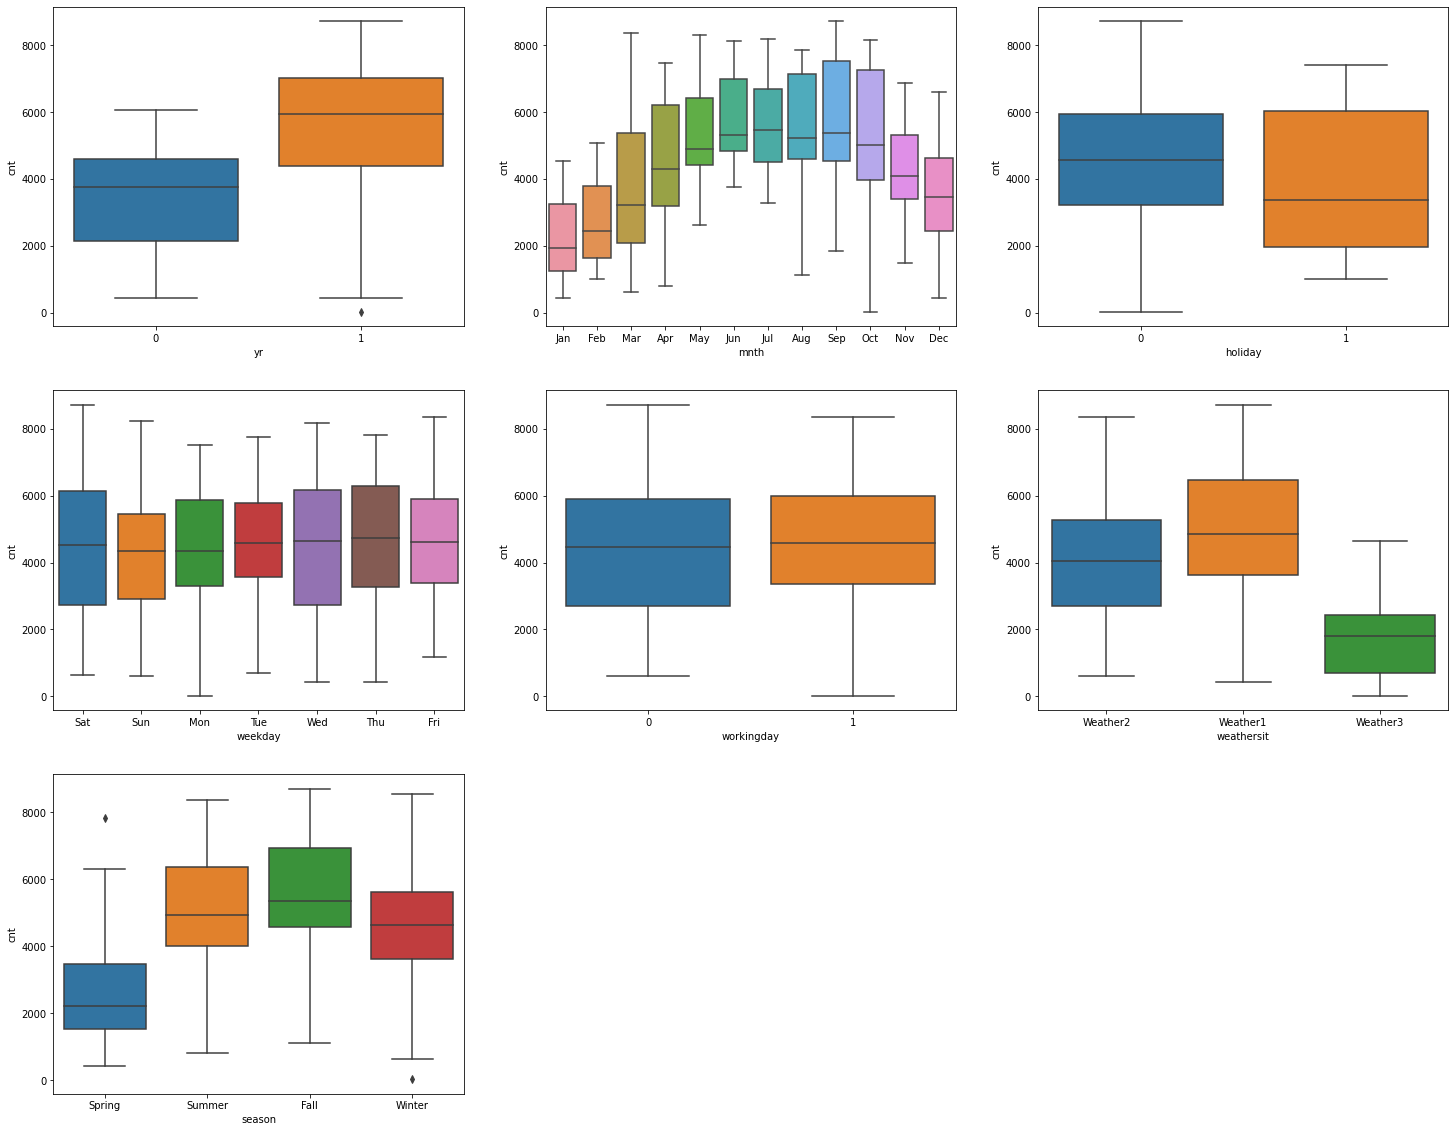

In [957]:
plt.figure(figsize=(25, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.show()

### Inferences:

- 2019 saw a clear jump of rentals over 2018
- The summer months of June to September have higher count of rentals than the winter and spring months
- Median of rentals on a holiday are clearly lower than median of rentals on a non-holiday
- Weekday, Workiday do not show any significant effect on count
- Weather shows significant difference of rentals between its categories. Better the weather conditions, higher are the rental numbers

### Check if years show a different pattern of count for each of the months. Also check if month of year have a differnent pattern of count across years. 

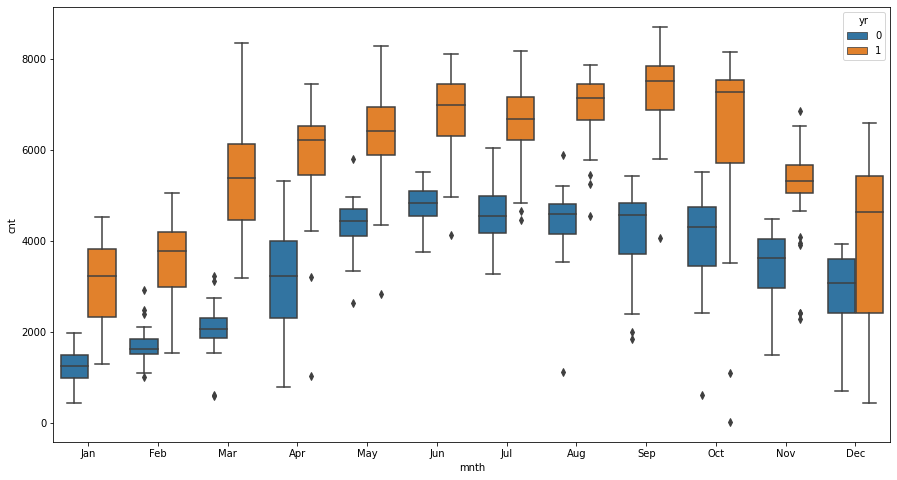

In [963]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'yr', data = data)
plt.show()

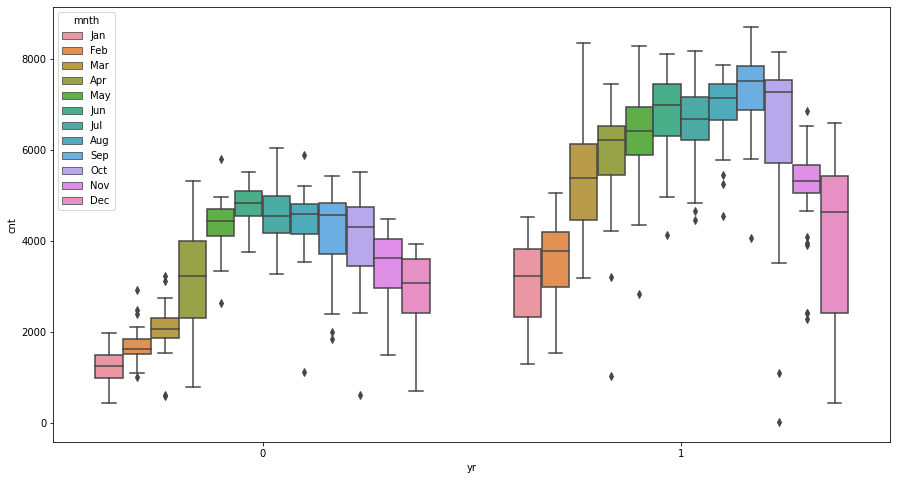

In [964]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'yr', y = 'cnt', hue = 'mnth', data = data)
plt.show()

*** It is observed that months and years show consistent patternt of counts and are independent of each other ***

### Check how rentals count varies with range of tempratures

In [965]:
#make another copy and bin the tempratures
data_copy2 = data.copy()
data_copy2['temp_bin'] = data_copy2.temp.apply(lambda x: round(x))

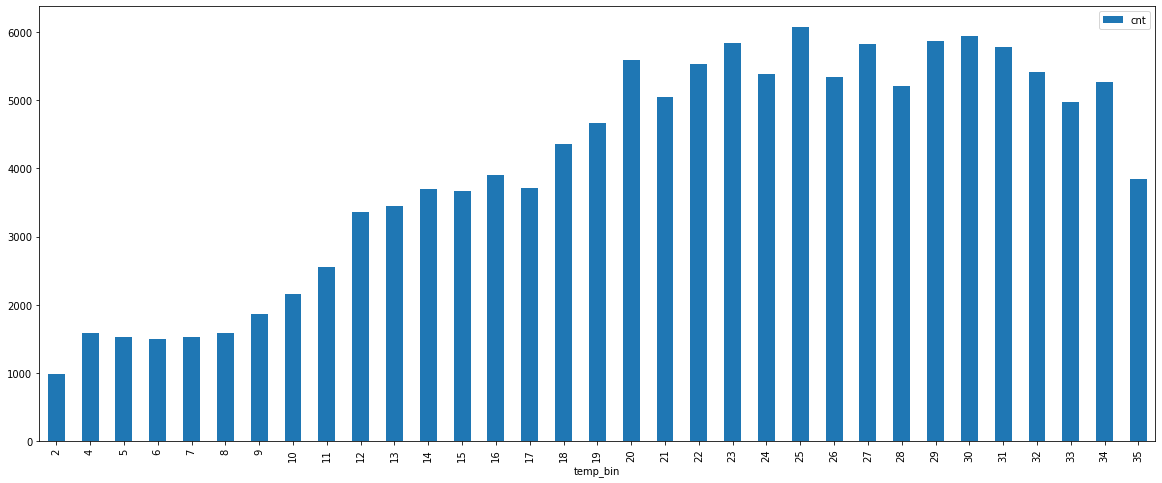

In [966]:
pd.pivot_table(data=data_copy2,values='cnt',index='temp_bin',
               aggfunc= lambda x:sum(x)/len(x)).plot.bar(figsize=(20,8))
plt.show()

***It can be seen that rentals clearly increase with incureasing temprature upto a certain point after which it decreases slightly***

#### Since dummy variables have now been  created, we don't need 'mnth', 'weekday', 'season', and 'weathersit' in the dataframe

In [869]:
data = data.drop(['mnth', 'weekday', 'season', 'weathersit'], axis=1)

#### Causal and Registered need to be dropped as they, like count, cannot be known at the start of the day and thus are not helpful in predicting the count

In [870]:
data = data.drop(['casual', 'registered'], axis=1)

### Drop atemp is its highly correlated with temp

In [871]:
data = data.drop(['atemp'], axis=1)

### Model Building
#### We are now ready to start building the regression model. We start by splitting the data into test and training sets

In [975]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Scale the numerical variables on training set using min-max scalar. We do scaling separately on training and test sets as we are supposed to pretent that we do not know the test data

In [976]:
from sklearn.preprocessing import MinMaxScaler

In [977]:
scaler = MinMaxScaler()

In [978]:
num_vars = ['cnt', 'temp', 'hum','windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

/Users/Teepeez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Teepeez/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [979]:
df_train




,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Weather3,Mon,Sat,Sun,Thu,Tue,Wed,Spring,Summer,Winter
653,Winter,1,Oct,0,Tue,1,Weather1,0.509887,23.04230,0.575354,...,0,0,0,0,0,1,0,0,0,1
576,Fall,1,Jul,0,Tue,1,Weather1,0.815169,33.14480,0.725633,...,0,0,0,0,0,1,0,0,0,0
426,Spring,1,Mar,0,Sat,0,Weather2,0.442393,20.67460,0.640189,...,0,0,1,0,0,0,0,1,0,0
728,Spring,1,Dec,0,Sun,0,Weather1,0.245101,11.58500,0.498067,...,0,0,0,1,0,0,0,1,0,0
482,Summer,1,Apr,0,Sat,0,Weather2,0.395666,18.87520,0.504508,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,Summer,1,Jun,0,Mon,1,Weather2,0.824514,32.98605,0.605840,...,0,1,0,0,0,0,0,0,1,0
578,Fall,1,Aug,0,Thu,1,Weather1,0.863973,35.35440,0.679690,...,0,0,0,0,1,0,0,0,0,0
53,Spring,0,Feb,0,Wed,1,Weather1,0.202618,12.28585,0.435939,...,0,0,0,0,0,0,1,1,0,0
350,Winter,0,Dec,0,Sat,0,Weather2,0.248216,12.46855,0.577930,...,0,0,1,0,0,0,0,0,0,1


### Check correlation matrix with newly created dummy variables

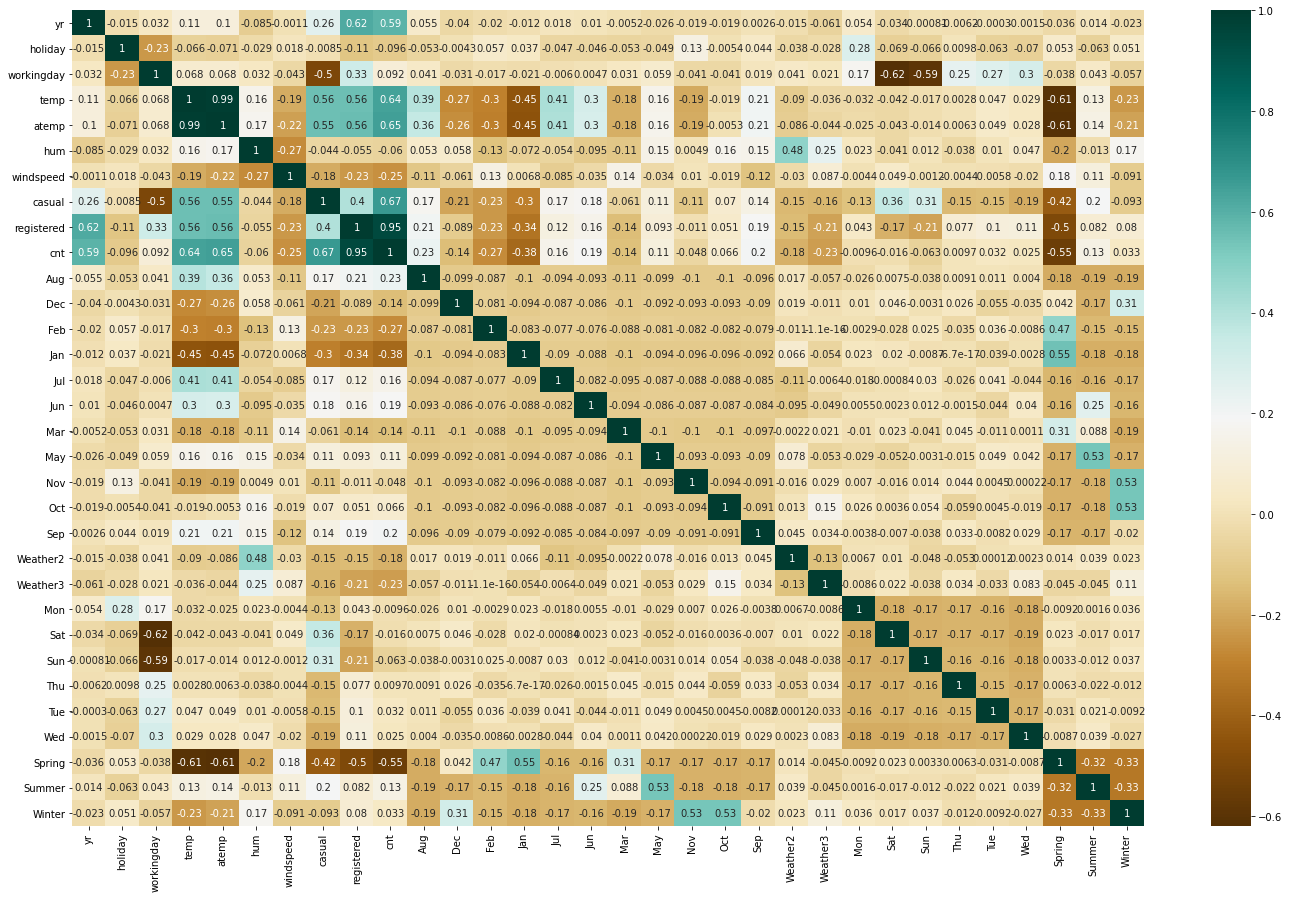

In [980]:
plt.figure(figsize = (24, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="BrBG")
plt.show()

In [981]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Weather3,Mon,Sat,Sun,Thu,Tue,Wed,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,23.493909,0.650369,0.320768,837.543137,3648.839216,0.513620,...,0.029412,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,8.090038,0.145882,0.169797,675.921998,1580.336986,0.224593,...,0.169124,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,2.000000,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,16.603063,0.538643,0.199179,311.000000,2468.250000,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,24.020400,0.653714,0.296763,700.000000,3657.000000,0.518638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,30.177700,0.754830,0.414447,1076.250000,4841.000000,0.684710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,3283.000000,6946.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


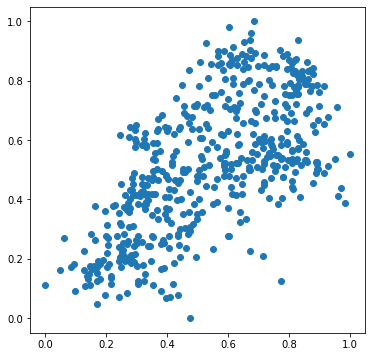

In [982]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

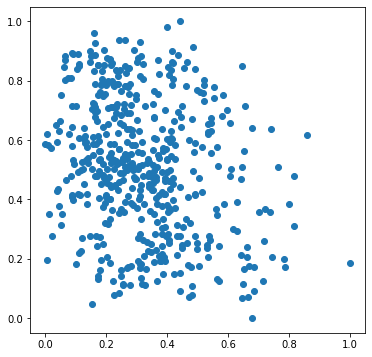

In [983]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.windspeed, df_train.cnt)
plt.show()

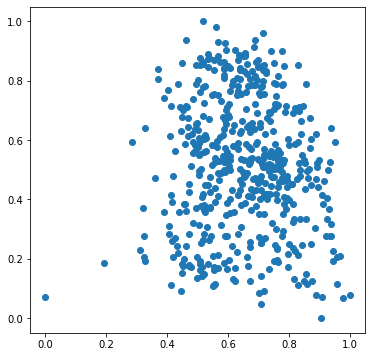

In [984]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.hum, df_train.cnt)
plt.show()

In [985]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE
Recursive feature elimination. We start by selecting 15 estimators using RFE and attempt to narrow it down to 10 using a manual process


In [986]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [987]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

ValueError: could not convert string to float: 'Winter'

In [988]:
# Check the variables spit out by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('weathersit', False, 6),
 ('temp', False, 3),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', False, 13),
 ('registered', False, 14),
 ('Aug', False, 5),
 ('Dec', False, 2),
 ('Feb', False, 10),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', True, 1),
 ('Mar', False, 8),
 ('May', True, 1),
 ('Nov', False, 7),
 ('Oct', False, 11),
 ('Sep', False, 9),
 ('Weather2', False, 12),
 ('Weather3', True, 1),
 ('Mon', True, 1),
 ('Sat', True, 1)]

In [886]:
# Columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan', 'Jul',
       'Sep', 'Weather2', 'Weather3', 'Sat', 'Spring', 'Summer', 'Winter'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [989]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [990]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [991]:
X_train_rfe

,const,yr,holiday,workingday,temp,hum,windspeed,Jan,Jul,Sep,Weather2,Weather3,Sat,Spring,Summer,Winter
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,0,0,0,0,1
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,1,1,0,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,0.824514,0.605840,0.355596,0,0,0,1,0,0,0,1,0
578,1.0,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.435939,0.111379,0,0,0,0,0,0,1,0,0
350,1.0,0,0,0,0.248216,0.577930,0.431816,0,0,0,1,0,1,0,0,1


In [992]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [993]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          2.31e-191
Time:                        22:10:32   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.036      6.949      0.0

In [994]:
#Find VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns[1:]
vif['VIF'] = [variance_inflation_factor(X_train_rfe.iloc[:,1:].values, i) for i in range(X_train_rfe.iloc[:,1:].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
12,Spring,4.53
14,Winter,3.48
13,Summer,2.84
9,Weather2,2.29
0,yr,2.09
11,Sat,1.98


#### We can see that all variables satisfy of significance thershold of p<0.05 but humidity has a very high VIF. This is not surprising as humidity is expected to be correlated with temprature and months of the year. We start by reoving humidity first and redo the model and find VIFs again

In [894]:
X_train_rfe1 = X_train_rfe.drop(['hum'], 1)

In [895]:
lm = sm.OLS(y_train,X_train_rfe1).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          7.33e-189
Time:                        16:28:18   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.525      0.0

In [896]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns[1:]
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.iloc[:,1:].values, i) for i in range(X_train_rfe1.iloc[:,1:].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
11,Spring,3.08
12,Summer,2.33
0,yr,2.08
13,Winter,1.99
10,Sat,1.97
5,Jan,1.62
6,Jul,1.59


#### Though all variables remain significant, Jan's significance level is still comparatively high. From box plot we saw Jan has low rental count and low variance, so its not expected to have high explanatory power. Though temp has a high VIF, we prefer not to remove it right now as it has high correlation with count. It is expected that as we removed other variables, temp's VIF will decrease.

In [995]:
X_train_rfe1 = X_train_rfe.drop(['hum','Jan'], 1)
lm = sm.OLS(y_train,X_train_rfe1).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          5.73e-189
Time:                        22:19:22   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1577      0.031      5.134      0.0

In [996]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns[1:]
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.iloc[:,1:].values, i) for i in range(X_train_rfe1.iloc[:,1:].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
10,Spring,2.49
11,Summer,2.32
0,yr,2.07
12,Winter,1.99
9,Sat,1.96
5,Jul,1.58
7,Weather2,1.56


#### Again, all variables remain significant. From VIFs we see that windspeed and workingday have high VIFs. We remove workingday

In [997]:
X_train_rfe1 = X_train_rfe.drop(['hum','Jan','workingday'], 1)
lm = sm.OLS(y_train,X_train_rfe1).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.4
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          7.97e-187
Time:                        22:21:50   Log-Likelihood:                 500.76
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     497   BIC:                            -920.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1962      0.030      6.640      0.0

In [998]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns[1:]
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.iloc[:,1:].values, i) for i in range(X_train_rfe1.iloc[:,1:].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.12
3,windspeed,4.62
10,Summer,2.22
9,Spring,2.10
0,yr,2.07
11,Winter,1.80
4,Jul,1.58
6,Weather2,1.55
5,Sep,1.34
8,Sat,1.19


#### Still, windspeed has a relatively high VIF. From scatterplots we saw that windspeed doesn't show any significant relation with count so we remove it.

In [1001]:
X_train_rfe1 = X_train_rfe.drop(['hum','Jan','windspeed', 'workingday'], 1)
lm = sm.OLS(y_train,X_train_rfe1).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.5
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          1.57e-180
Time:                        22:25:38   Log-Likelihood:                 483.04
No. Observations:                 510   AIC:                            -942.1
Df Residuals:                     498   BIC:                            -891.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1468      0.029      5.002      0.0

In [1002]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns[1:]
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.iloc[:,1:].values, i) for i in range(X_train_rfe1.iloc[:,1:].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.27
0,yr,2.07
9,Summer,1.93
10,Winter,1.60
3,Jul,1.58
5,Weather2,1.55
8,Spring,1.43
4,Sep,1.34
7,Sat,1.19
6,Weather3,1.07


#### Temprature's VIF is now below 5. Sat has now become insignificant with p value of 0.151 so we remove it

In [1004]:
X_train_rfe1 = X_train_rfe.drop(['hum','Jan','windspeed', 'workingday', 'Sat'], 1)
lm = sm.OLS(y_train,X_train_rfe1).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          2.80e-181
Time:                        22:28:37   Log-Likelihood:                 481.98
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1503      0.029      5.134      0.0

In [1006]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns[1:]
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.iloc[:,1:].values, i) for i in range(X_train_rfe1.iloc[:,1:].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.22
0,yr,2.06
8,Summer,1.93
3,Jul,1.58
9,Winter,1.58
5,Weather2,1.55
7,Spring,1.40
4,Sep,1.34
6,Weather3,1.07
1,holiday,1.04


### This is now the final model with 10 variables

In [1008]:
#isolate columns to keep
colstokeep = X_train_rfe1.columns
colstokeep

Index(['const', 'yr', 'holiday', 'temp', 'Jul', 'Sep', 'Weather2', 'Weather3',
       'Spring', 'Summer', 'Winter'],
      dtype='object')

## Residual Analysis of the train data

#### Make predictions on the training set and make a distplot error terms, which is actual count minus predicted count

In [1009]:
y_train_cnt = lm.predict(X_train_rfe1)

/Users/Teepeez/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

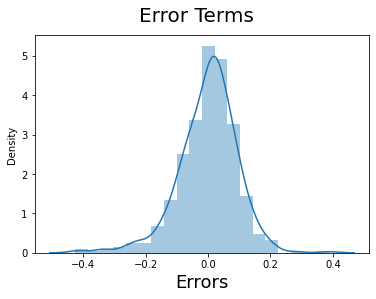

In [1010]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

#### It can be observed that error terms make a nice bell curve. This implies that errors are independent and identically distributed and follow a roughly normal distribution

#### Now prepare the test data to test the model

In [1013]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Weather3,Mon,Sat,Sun,Thu,Tue,Wed,Spring,Summer,Winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,24.255828,0.508750,0.418870,875.968037,3671.013699,0.516216,...,0.027397,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.249189,8.299641,0.201253,0.188111,712.783588,1509.322560,0.238702,...,0.163612,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.000000,4.941955,0.000000,0.000000,9.000000,432.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,17.085500,0.358469,0.283817,336.500000,2507.500000,0.359882,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,24.873150,0.494200,0.402533,736.000000,3667.000000,0.520241,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,31.155725,0.651165,0.524362,1190.000000,4624.000000,0.682487,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,41.318550,1.000000,1.000000,3410.000000,6844.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1014]:
num_vars = ['cnt', 'temp', 'hum','windspeed']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

/Users/Teepeez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Teepeez/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [1015]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Weather3,Mon,Sat,Sun,Thu,Tue,Wed,Spring,Summer,Winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,24.255828,0.508750,0.418870,875.968037,3671.013699,0.516216,...,0.027397,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.249189,8.299641,0.201253,0.188111,712.783588,1509.322560,0.238702,...,0.163612,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.000000,4.941955,0.000000,0.000000,9.000000,432.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,17.085500,0.358469,0.283817,336.500000,2507.500000,0.359882,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,24.873150,0.494200,0.402533,736.000000,3667.000000,0.520241,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,31.155725,0.651165,0.524362,1190.000000,4624.000000,0.682487,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,41.318550,1.000000,1.000000,3410.000000,6844.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1017]:
#separate dependent and independent test variables into different datasets
y_test = df_test.pop('cnt')
X_test = df_test

In [1018]:
#add constant of 1 as statsmodel does give intercept by default. 
#The coefficient of constant term will be the intercept
X_test_new = sm.add_constant(X_test)

In [1019]:
#Narrow the dataset to selected variables
X_test_new = X_test_new[colstokeep]

In [1020]:
# Making predictions using the fourth model

y_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

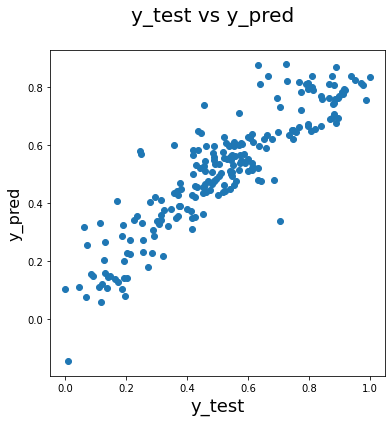

In [1021]:
#Make a scatterplot of actual vs predicted values on the test dataset
fig = plt.figure(figsize=[6,6])
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

#### It is evident that the scatter plot falls neatly on a roghly 45 degree line, though some upward bias can be seen, especially towards the extremeties. This could be happening because the relationship between count and explanatory variables is not truly linear

#### Check R-Squared for the predicted data

In [1024]:
from sklearn.metrics import r2_score

In [1025]:
print("r2_score",r2_score(y_test,y_pred))

r2_score 0.8056635005870294


#### R-Squared of 0.805 is decent and not significantly lower than the training data. This means that 80.05% of variation in count is being explained by the variables selected in the model

/Users/Teepeez/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

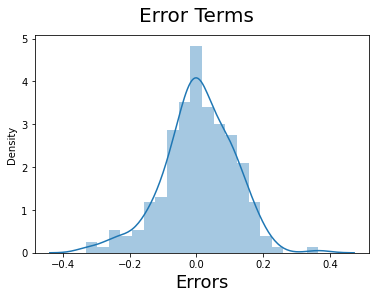

In [1029]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

#### It can be seen that error are roughly normally distributed

#### Check Q-Q plot of the residuals on test set

In [1026]:
res = lm.resid


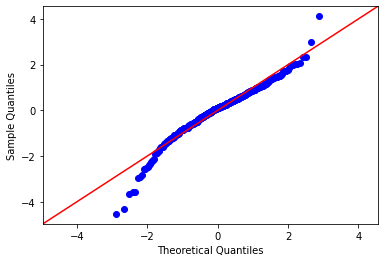

In [1027]:
import scipy.stats as stats
fig = sm.qqplot(res, stats.norm, fit=True, line="45")
plt.show()

#### Q-Q plot shows some deviations from normality towards the extermities. Such a pattern suggests fatter tails than a normal distribution. Try Q-Q plot on a T-distribution

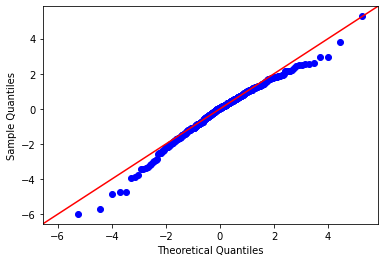

In [1028]:
import scipy.stats as stats
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.show()

#### With T-distribution the sample quantiles are lower than theoretical quantiles towards the extremities of the distribution. This suggests that the distribution is somewhere between a normal a T-distributions and there aren't any significant deviations from normality

### Final Model is cnt = 0.1503  + 0.2325 x yr - 0.1008 x holiday +  0.5034 x temp -0.0527 x Jul + 0.0810 x Sep -0.0798 x Weather2 - 0.2999 x Weather3  -0.0764 x Spring + 0.0355 x Summer + 0.0842 x Winter